In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [4]:
#Import pulse classes
from qiskit.pulse import Waveform, DriveChannel, Play, Schedule
#Import helpful utils
from qiskit.scheduler.utils import measure_all

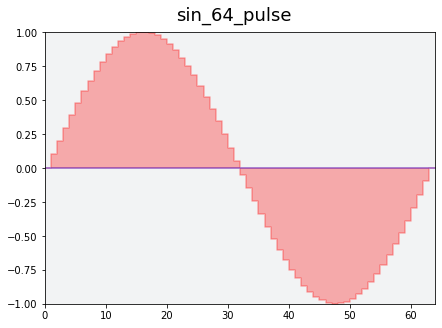

In [5]:
import numpy as np
x = np.linspace(0, 2*np.pi,64)
data = np.sin(x)
sample_pulse = Waveform(data, name="sin_64_pulse")
sample_pulse.draw()

In [6]:
data

array([ 0.00000000e+00,  9.95678466e-02,  1.98146143e-01,  2.94755174e-01,
        3.88434796e-01,  4.78253979e-01,  5.63320058e-01,  6.42787610e-01,
        7.15866849e-01,  7.81831482e-01,  8.40025923e-01,  8.89871809e-01,
        9.30873749e-01,  9.62624247e-01,  9.84807753e-01,  9.97203797e-01,
        9.99689182e-01,  9.92239207e-01,  9.74927912e-01,  9.47927346e-01,
        9.11505852e-01,  8.66025404e-01,  8.11938006e-01,  7.49781203e-01,
        6.80172738e-01,  6.03804410e-01,  5.21435203e-01,  4.33883739e-01,
        3.42020143e-01,  2.46757398e-01,  1.49042266e-01,  4.98458857e-02,
       -4.98458857e-02, -1.49042266e-01, -2.46757398e-01, -3.42020143e-01,
       -4.33883739e-01, -5.21435203e-01, -6.03804410e-01, -6.80172738e-01,
       -7.49781203e-01, -8.11938006e-01, -8.66025404e-01, -9.11505852e-01,
       -9.47927346e-01, -9.74927912e-01, -9.92239207e-01, -9.99689182e-01,
       -9.97203797e-01, -9.84807753e-01, -9.62624247e-01, -9.30873749e-01,
       -8.89871809e-01, -

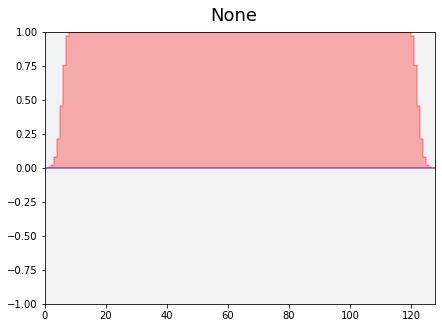

In [16]:
#Import Gaussian Square pulse from pulse library
from qiskit.pulse.pulse_lib import GaussianSquare
#Create a Gaussian Square pulse:
#Args: duration, amp, sigma, width, name
gaussian_square_pulse = GaussianSquare(128,1,2,112,name="gaussian square")
gaussian_square_pulse.draw()

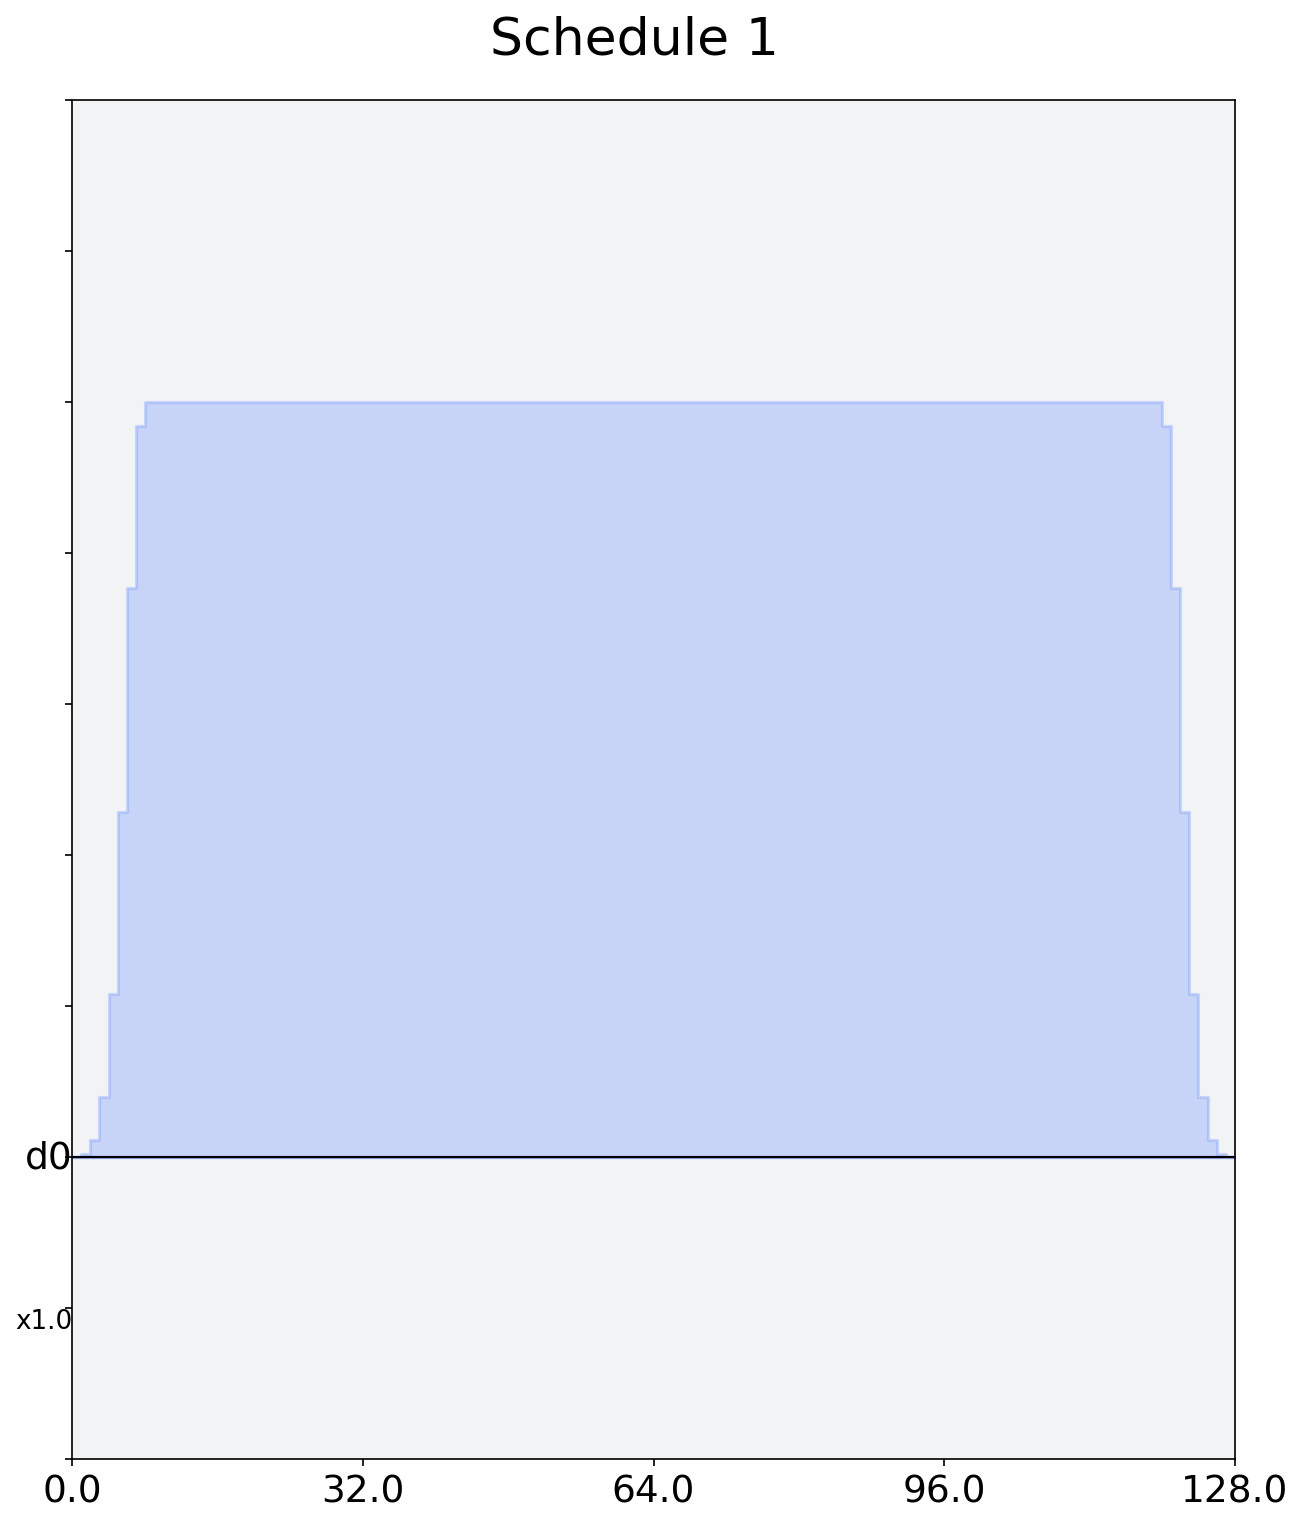

In [17]:
#Create 1st schedule with Gaussian square pulse
schedule_1 = Schedule(name='Schedule 1')
schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))
#Draw the schedule
schedule_1.draw()

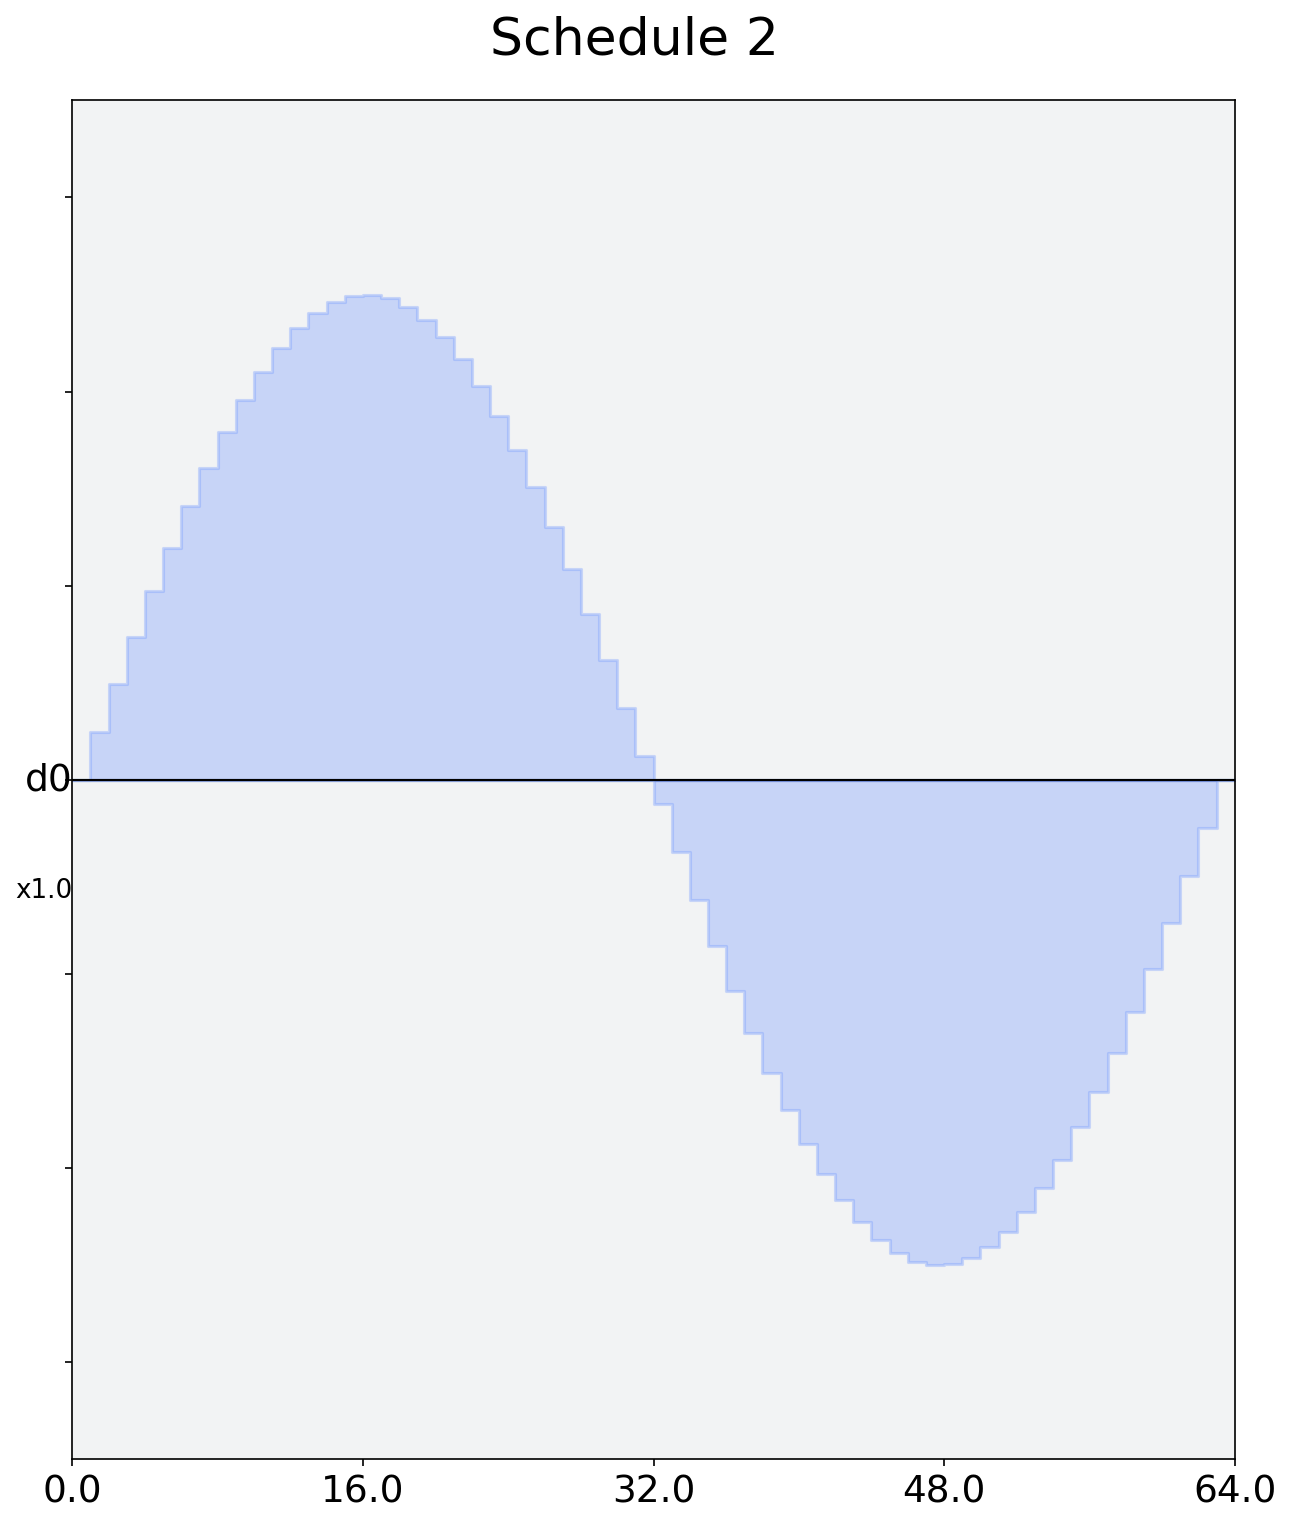

In [18]:
#Create 2nd schedule with sample pulse
schedule_2 = Schedule(name='Schedule 2')
schedule_2 = schedule_2.insert(0, Play(sample_pulse, DriveChannel(0)))
#Draw the schedule
schedule_2.draw()

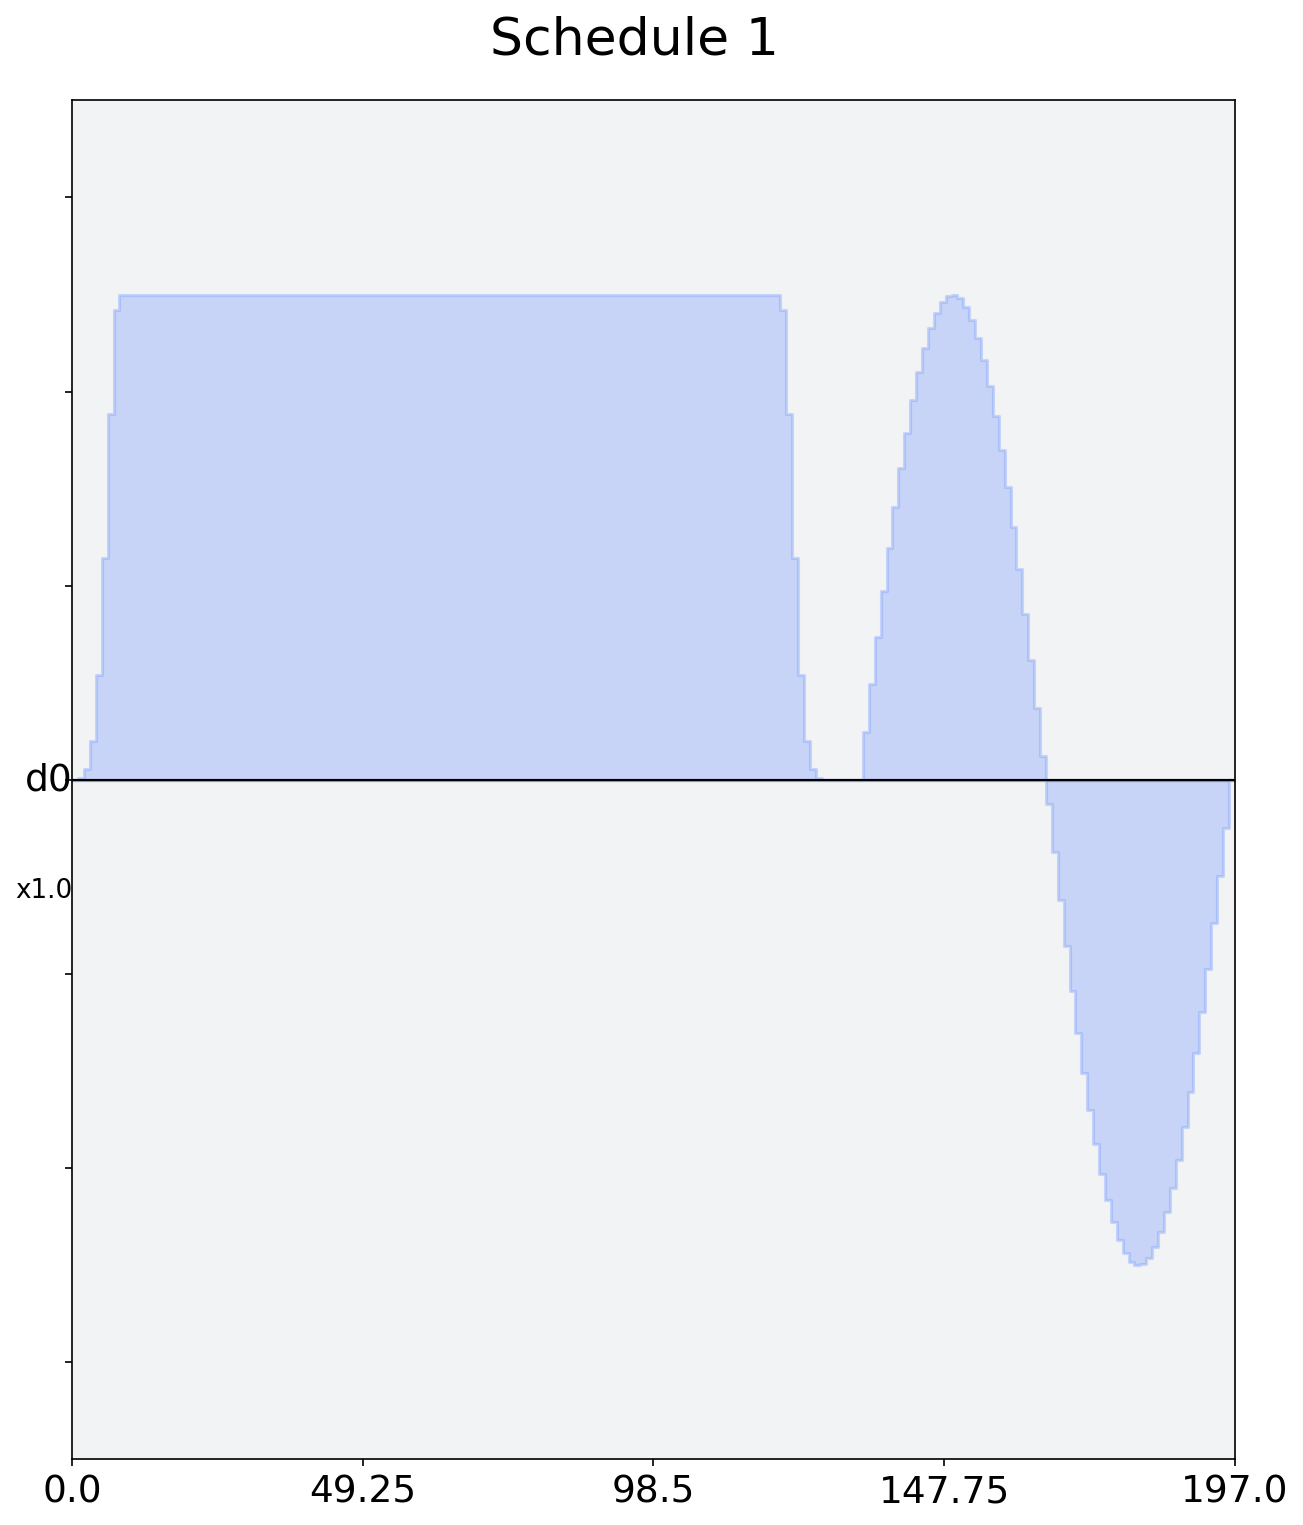

In [19]:
#3rd scheudle which is an additoin of the first two schedules and shifting the 2nd by 5
schedule_3 = schedule_1.insert(schedule_1.duration+5,schedule_2)
schedule_3.draw()

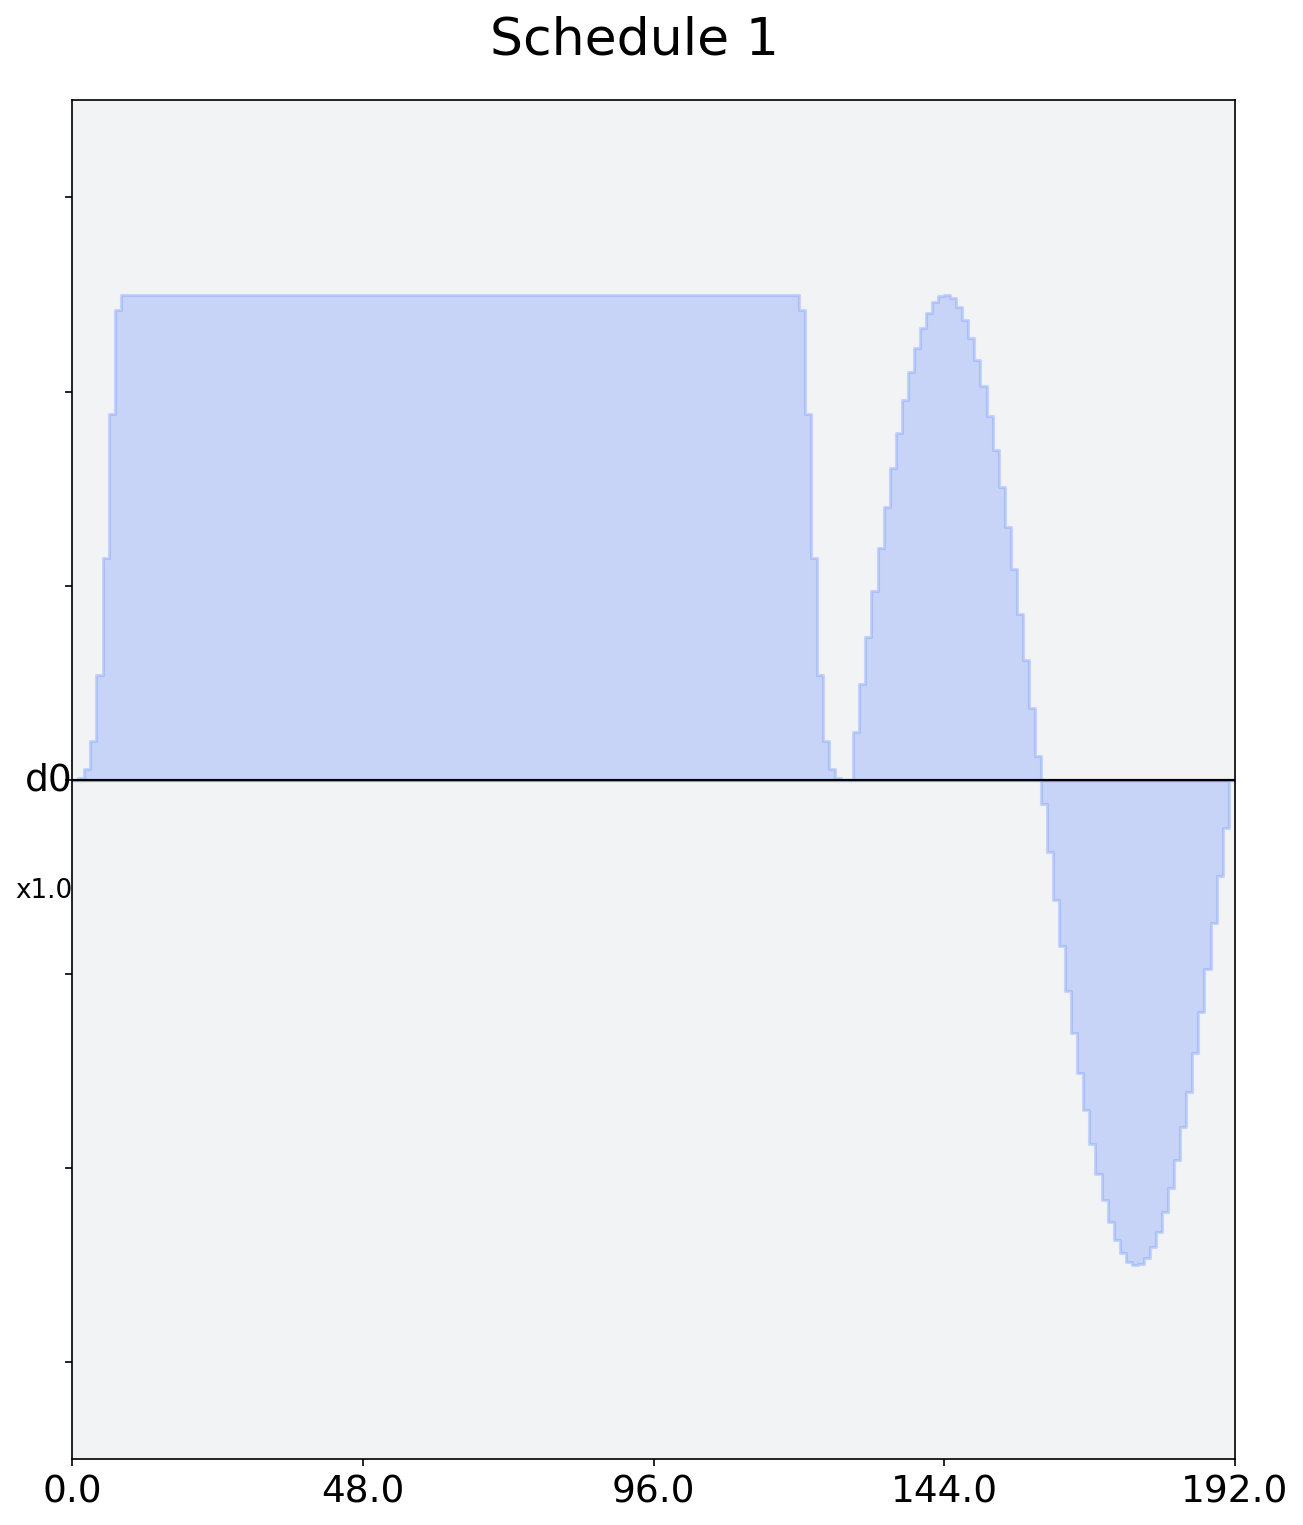

In [20]:
#Alternatively they could have been appended
schedule_3_append = schedule_1.append(schedule_2)
schedule_3_append.draw()